In [81]:
import numpy as np
import pandas as pd

In [82]:
# df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [83]:
df = pd.read_csv('updated_data.csv', encoding="ISO-8859-1")

In [84]:
# Create a new DataFrame with the new data
# new_data = pd.DataFrame({'v1': ['spam'], 'v2': ["YOUU Have Been PAlD Check Yourr Account-Now $1000.00 User ID#372-80482"],'Unnamed: 2':['NaN'],'Unnamed: 3':['NaN'],'Unnamed: 4':['NaN']})
# new_data = pd.DataFrame({'v1': ['spam'], 'v2': ["Hi 8529437494, Transaction Successfully done of Rs.82590.00 to your Rummy account on date 26 Jan Withdraw it now. c3m.me/11a0s2"],'Unnamed: 2':['NaN'],'Unnamed: 3':['NaN'],'Unnamed: 4':['NaN']})
# new_data = pd.DataFrame({'v1': ['spam'], 'v2': ["Hi, get up to 2000000/- without paperwork. Navi Personal Loan. Instant disbursal & flexible EMIs. Apply here. TnC apply rqtm.in/Akk/BwU BVS"],'Unnamed: 2':['NaN'],'Unnamed: 3':['NaN'],'Unnamed: 4':['NaN']})
# new_data = pd.DataFrame({'v1': ['spam'], 'v2': ["Congrats 85294374XX, 3000 Bonus! MUM VS CHN T20 is Live. Beat and Win Cash. Make your team & WIN LAKHS on Howzat! http://1kx.in/a1OkPy"],'Unnamed: 2':['NaN'],'Unnamed: 3':['NaN'],'Unnamed: 4':['NaN']})
# new_data = pd.DataFrame({'v1': ['spam'], 'v2': ["Dear 8529XXXX94 Born between 1965-1985? Term Life Insurance Worth Rs.1Cr at Rs.490/Month* from PolicyBazaar txtby.me/tc/19vcnu1f_EWG -ADC"],'Unnamed: 2':['NaN'],'Unnamed: 3':['NaN'],'Unnamed: 4':['NaN']})

# # Concatenate the new data to the existing data
# df = pd.concat([df, new_data], ignore_index=True)

# # Save the updated data to a new CSV file
# df.to_csv('updated_data.csv', index=False)

In [85]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4250,ham,Omg Joanna is freaking me out. She's looked th...,NaN,NaN,NaN
3682,ham,When did i use soc... I use it only at home......,NaN,NaN,NaN
282,ham,Ok. I asked for money how far,NaN,NaN,NaN
3988,ham,Ok lor. Anyway i thk we cant get tickets now c...,NaN,NaN,NaN
2234,ham,What's your room number again? Wanna make sure...,NaN,NaN,NaN


In [86]:
df.shape

(5573, 5)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5573 non-null   object
 1   v2          5573 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [88]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [89]:
df.shape

(5573, 2)

In [90]:
df.sample(6)

,v1,v2
1291,ham,Hey babe! I saw you came online for a second a...
3714,ham,"I am late,so call you tomorrow morning.take ca..."
4270,spam,Natalja (25/F) is inviting you to be her frien...
919,ham,Dont talk to him ever ok its my word.
2678,ham,Was playng 9 doors game and gt racing on phone...
455,ham,Si si. I think ill go make those oreo truffles.


In [91]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
190,spam,Are you unique enough? Find out from 30th Augu...
3953,ham,I probably won't eat at all today. I think I'm...
5385,ham,How do friends help us in problems? They give ...
4480,ham,No..its ful of song lyrics..
5460,spam,December only! Had your mobile 11mths+? You ar...


In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [93]:
df['target'] = encoder.fit_transform(df['target'])

In [94]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [96]:
df.duplicated().sum()

403

In [97]:
df = df.drop_duplicates(keep='first')

In [98]:
df.shape

(5170, 2)

In [99]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
df['target'].value_counts()

0    4516
1     654
Name: target, dtype: int64

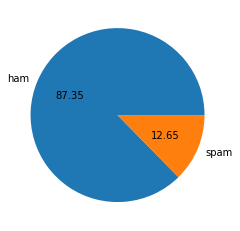

In [101]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [102]:
!pip install nltk

In [103]:
import nltk

In [104]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahamtullahsheikh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
df['num_characters'] = df['text'].apply(len)

In [106]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [107]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [108]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [109]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [110]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5170.000000,5170.000000,5170.000000
mean,79.705609,18.454159,1.948162
std,58.637988,13.324380,1.363660
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [111]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,71.025465,17.120903,1.799601
std,56.605491,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [112]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,654.000000,654.00000,654.000000
mean,139.643731,27.66055,2.974006
std,30.725679,7.01635,1.487342
min,13.000000,2.00000,1.000000
25%,132.250000,25.00000,2.000000
50%,151.000000,29.00000,3.000000
75%,159.000000,32.00000,4.000000
max,228.000000,46.00000,8.000000


In [113]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

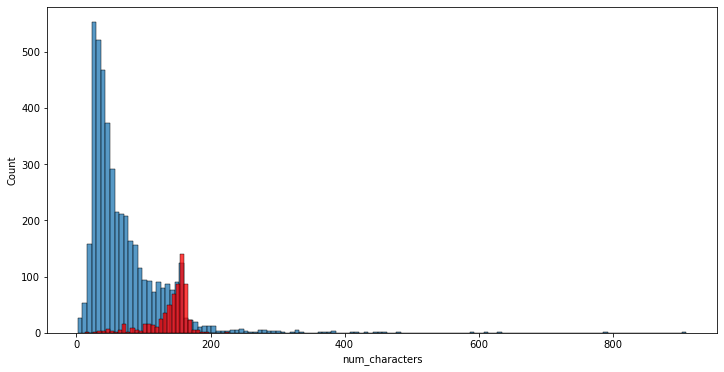

In [114]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

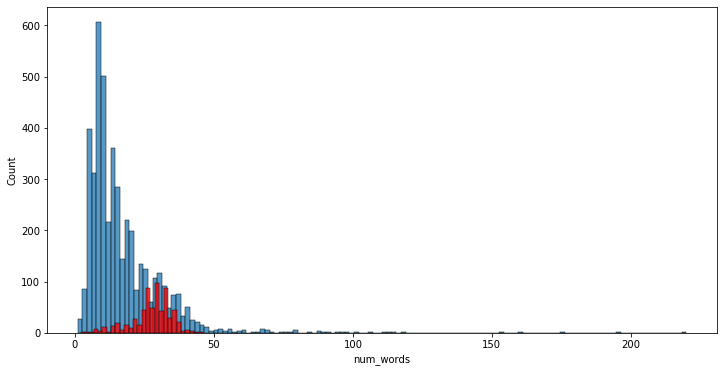

In [115]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

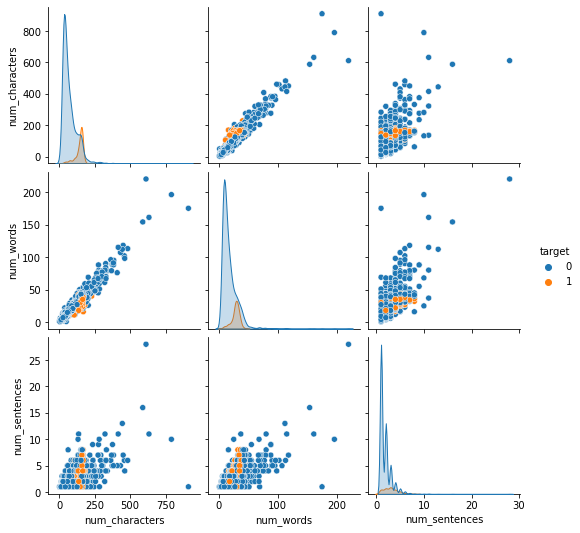

In [116]:
sns.pairplot(df,hue='target')

In [117]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5568,0,Will Ã¯Â¿Â½_ b going to esplanade fr home?,42,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1
5571,0,Rofl. Its true to its name,26,7,2


<AxesSubplot:>

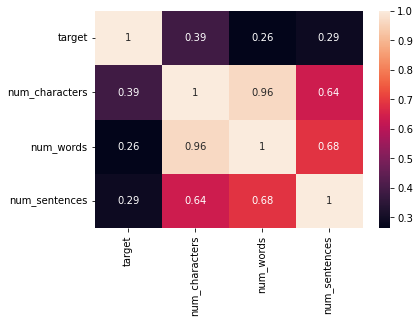

In [118]:
sns.heatmap(df.corr(),annot=True)

In [119]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
nltk.download('punkt')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahamtullahsheikh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahamtullahsheikh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [120]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [121]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [122]:
df['transformed_text'] = df['text'].apply(transform_text)

In [123]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [124]:
!pip install wordcloud

In [125]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [126]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

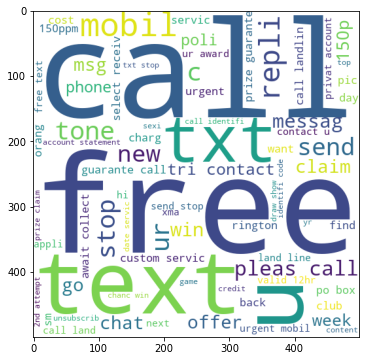

In [127]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [128]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

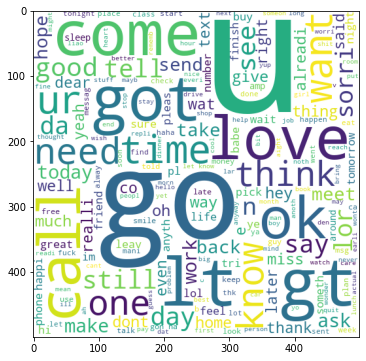

In [129]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [130]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [131]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [132]:
len(spam_corpus)

9944

In [133]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [134]:
len(ham_corpus)

35295

In [135]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [136]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [137]:
X.shape

(5170, 3000)

In [138]:
y = df['target'].values

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [141]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [142]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [143]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8568665377176016
[[775 125]
 [ 23 111]]
0.4703389830508475


In [144]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[900   0]
 [ 29 105]]
1.0


In [145]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))